In [1]:
# Run this cell first if you intend to run other Python cells later.
# This cell notwithstanding, all other cells are independent.
# If you are only reading the text and equations, you don't have to run this cell.
import numpy as np
import matplotlib.pyplot as plt

### Matrix shapes

#### Overview
This section describes the shape (dimensions) of common matrices in a neural network.

#### X: Input dataset
Each column is a training example and each row is a feature. The transpose of this matrix is used for linear and logistic regression analyses with sklearn. The number of training examples is $m$ and the number of input features is either $n_0$ or $n_x$. If each training example is a multi-dimensional array, such as a grayscale image (2D: length x width) or color image (3D: length x width x 3 RBG channels), it must be unrolled into a column vector whereby the number of rows is equal to the production of all dimensions.

It is common to vertically split $X$ into 3 parts after shuffling the examples: training, validating, and testing. Typical percentage splits between $J_{train}$/$J_{cv}$/$J_{test}$ are 70/15/15 or 60/20/20. As the number of training examples increases, $J_{train}$ can also increase. If there are millions of examples, a 98/1/1 split may be adequate.

$$
X ({n_0}, m) = A^{[0]} =
\begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
x^{(1)}_{n_0} & x^{(2)}_{n_0} & \cdots & x^{(m)}_{n_0}
\end{bmatrix}
$$

#### Y: Expected outputs/labels
For linear and logistic regression problems, there will be a "right answer" corresponding to each training example. These neural networks will have a single unit in the output layer $(n_L=1)$. A multi-class problem (e.g. softmax) will also have one label per training example, although it is commonly one-hot encoded (OHE) into one label per class, represented by rows. This corresponds to one unit per class in the output layer of the neural network. Likewise, a multi-label problem (e.g. many yes/no questions at once) will have a similar shape, albeit without the one-hot restriction. Predictions/inferences from the model are stored in $\hat{y}$ or "y-hat" which always has the same shape as $y$ once OHE, if required, is complete.

$$
\begin{align}
Y_{singleclass} (1, m) & =
\begin{bmatrix}
y^{(1)} & y^{(2)} & \cdots & y^{(m)} \\
\end{bmatrix} \\
y_{multiclass} (n_L, m) & =
\begin{bmatrix}
y^{(1)}_1 & y^{(2)}_1 & \cdots & y^{(m)}_1 \\
y^{(1)}_2 & y^{(2)}_2 & \cdots & y^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
y^{(1)}_{n_L} & y^{(2)}_{n_L} & \cdots & y^{(m)}_{n_L}
\end{bmatrix}
\end{align}
$$

#### W: Weights
Each value corresponds to an edge, interconnecting units from the current layer to units in the previous layer. The rows correspond to the current layer's units while the columns correspond to the previous layer's units. Note that this matrix is a function of the neural network architecture and not a function of the training example quantity. No $W$ matrix ever has a dimension of $m$.

$$
W^{[l]} (n_l, {n_{l-1}}) =
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,n_{l-1}} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,n_{l-1}} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1} & w_{n_l,2} & \cdots & w_{n_l,n_{l-1}}
\end{bmatrix}
$$

#### b: Biases
A column vector with a value for each unit in the current layer. Like weights, the shape of this matrix depends upon the neural network's architecture (current layer only) and not the number of training examples $m$.

$$
b^{[l]} (n_l, 1)=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_{n_l} \\
\end{bmatrix}
$$

#### Z: Linear outputs
The algebraic combination of weights, biases, and previous layer activations. At the first layer, the previous layer activations is equal to $X$, the input data. Each column corresponds to a training example just like $X$ and $Y$ while the rows correspond to the number of units in the current layer.

$$
Z^{[l]} (n_l, m)=
\begin{bmatrix}
z^{(1)}_1 & z^{(2)}_1 & \cdots & z^{(m)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & \cdots & z^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
z^{(1)}_{n_l} & z^{(2)}_{n_l} & \cdots & z^{(m)}_{n_l}
\end{bmatrix}
$$

#### A: Activations
A transform function that enables a layer to represent the linear output in a more meaningful way to the next layer. Same shape as $Z$.

$$
A^{[l]} (n_l, m)=
\begin{bmatrix}
a^{(1)}_1 & a^{(2)}_1 & \cdots & a^{(m)}_1 \\
a^{(1)}_2 & a^{(2)}_2 & \cdots & a^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
a^{(1)}_{n_l} & a^{(2)}_{n_l} & \cdots & a^{(m)}_{n_l}
\end{bmatrix}
$$

### Categorical Feature Encoding

#### Overview
Sometimes features (rows of $X$ or $Y$) are represented by non-numeric identifiers, such as strings. This section explains how such data can be encoded in a machine-friendly format.

#### Ordinal Encoding
Ordinal encoding maps each unique string into a unique number. Such a technique is useful for decision trees or other algorithms that can learn/split on categorical values. It also works well when there is an intrinsic order to the categories, such as small (1), medium (2) and large (3). Ordinal encoding is sometimes known as "label encoding", not to be confused with the expected output labels of $Y$.

Consider $X$ with 3 features: height in inches, weight in pounds, and T-shirt size. Ordinal encoding answers the open-ended question in a single row of $X$: "What is the T-shirt size?"

$$
X =
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
\text{small} & \text{medium} & \text{small} & \cdots & \text{large}
\end{bmatrix}
\verb|--(ordinal_encode)-->|
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
1 & 2 & 1 & \cdots & 3
\end{bmatrix}
$$

Ordinal encoding does not require a meaningful amount of additional disk space or memory as it does not change the dimensionality of the source matrix. However, it's a poor choice for nominal, unorderable features. For example, the average of man (1), bear (2), pig (3) would be bear (2), which doesn't make sense.

#### One-hot Encoding (OHE)
One-hot encoding can be applied to features of $X$ or $Y$ (rows) to create a binary representation of the classes. Each training example in $X$ or label in $Y$ (columns) will have a single 1 with all other values set to 0.

For input features of $X$, OHE works better for nominal categories whereby there is no implicit ordering, such as the eeye colors of brown, blue, and green. Unlike T-shirt sizes, eye color is unlikely to be correlated with height or weight, and there is no direct comparison between the colors. A new feature is created for each possible category, which each answer a binary question:
  1. Is the eye color brown?
  2. Is the eye color blue?
  3. Is the eye color green?

Consider $X$ with 3 features: height in inches, weight in pounds, and eye color.

$$
X =
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
\, \text{brown} & \text{green} & \text{brown} & \cdots & \text{blue}\, 
\end{bmatrix}
\, \verb|--(one_hot_encode)-->|\, 
\begin{bmatrix}
60 & 65 & 62 & \cdots & 70 \\
100 & 140 & 110 & \cdots & 180 \\
1 & 0 & 1 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 1 \\
0 & 1 & 0 & \cdots & 0
\end{bmatrix}
$$

For output features of $Y$, OHE is the preferred approach for softmax regression as each training example will corresponded to a prediction containing $N$ different probabilities where $N$ is the number of categories. This is the structure of $\hat{Y}$. Consider $Y$ that corresponds with the $X$ example above containing height in inches, weight in pounds, and eye color. The model predicts hair color based on those inputs, selecting from the colors of black, brown, or blonde ($N=3$). A new feature is created for each possible category, which answers a binary question:
  1. Is the hair color black?
  2. Is the hair color brown?
  3. Is the hair color blonde?

$$
Y =
\begin{bmatrix}
\, \text{black} & \text{brown} & \text{black} & \cdots & \text{blonde}\, 
\end{bmatrix}
\, \verb|--(one_hot_encode)-->|\, 
\begin{bmatrix}
1 & 0 & 1 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix}
$$

The one-hot encoded version of $Y$ is now directly comparable with the softmax predictions $\hat{Y}$. This simplifies the cost calculation its corresponding derivatives.

The benefit of OHE is that it allows most machine learning algorithms, such as those used in neural networks, to train on nominal categories. The drawback is the increase in dimensionality. For a large number of input categories, the number of rows in $X$ (features) increases rapidly. At a minimum, this requires a large input layer to account for these features of $X$, increeasing the size of $W[1]$ and $b[1]$. Likewise, many output categories increases the number of rows of $Y$, thus increasing the size of $W[L]$ and $b[L]$. Training such a model may be more computationally expensive and require more time.

### Normalization

#### Overview
This section describes normalizers used for feature or neural network layer scaling. For all methods, be sure to apply normalization when making predictions using the same computed values (such as $\mu$, $\sigma$, and various minimums/maximums) to the new input. Normalization is not applied to categorical features of $X$ or labels of $\hat{Y}$.

The main benefit is that the ranges between values of a feature, and between features, will shrink. This allows you to use a larger learning rate $\alpha$ in gradient descent, reducing both time and computational energy required to train a model.

#### Z-score
Given $\vec{x}$, this method subtracts the mean $\mu$ then divides by the standard deviation $\sigma$ (not related to sigmoid activation function). This is most commonly used for general features, although may perform poorly with some extreme outliers. The mean is 0 and the standard deviation is 1. Positive numbers represent values above the mean while negative numbers represent values below the mean. It is also called "standardization" or "the standard scaler".

$$
\begin{align}
\mu = & \frac{1}{n} \cdot \sum\limits^n_{i=1}x_i \\
\sigma = & \sqrt{\frac{1}{n} \cdot \sum\limits^n_{i=1}{(x_i)}^2} \\
\vec{x}' = & \frac{\vec{x}-\mu}{\sigma}
\end{align}
$$

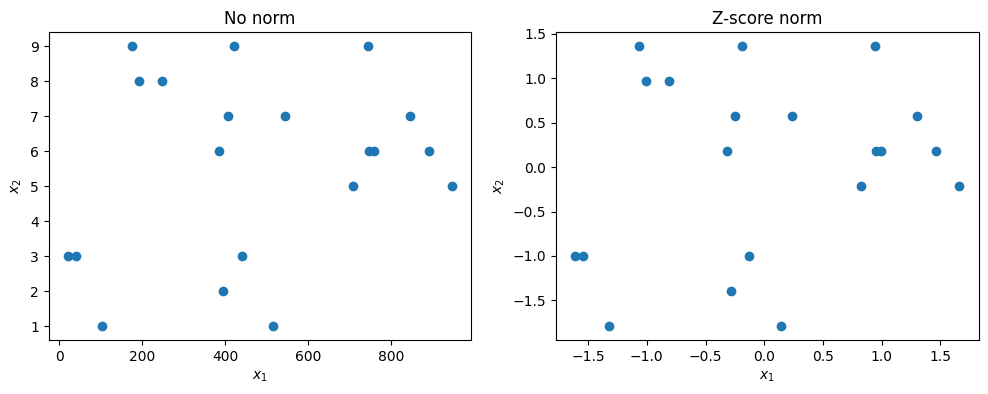

In [17]:
def zscore_norm(xvec):
    return (xvec - np.mean(xvec)) / np.std(xvec)

x_1 = np.random.randint(0, 1000, (20,))
x_2 = np.random.randint(0, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Z-score norm")
ax[1].plot(zscore_norm(x_1), zscore_norm(x_2), linestyle="", marker="o")

#### Clipping
Given $\vec{x}$ plus user-defined minimum and maximum thresholds, this method assigns extremely large outliers to the maximum and extremely small outliers to the minimum. Unlike the other methods, this only modifies a subset of values and may have no effect if the dataset lacks outliers.

$$
\vec{x}' =
\begin{cases}
x > \text{user}_{max}: & x := \text{user}_{max} \\
x < \text{user}_{min}: & x := \text{user}_{min}
\end{cases}
$$

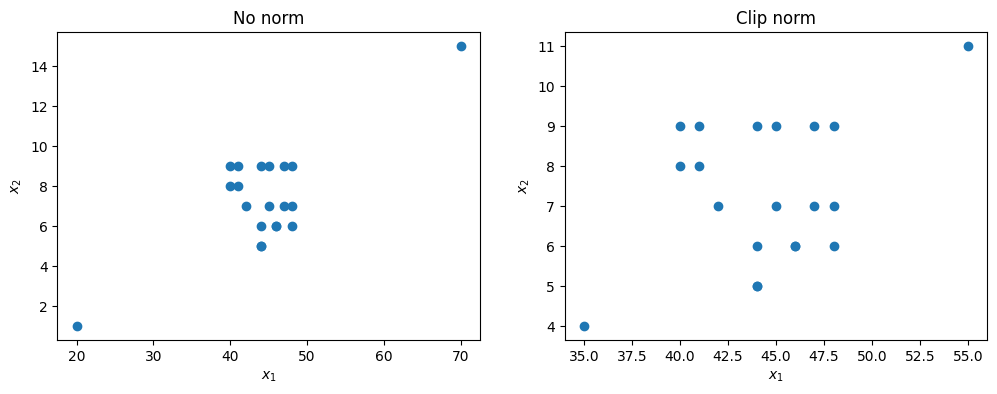

In [31]:
def clip_norm(xvec, umin, umax):
    xnew = np.copy(xvec)
    xnew[xvec > umax] = umax
    xnew[xvec < umin] = umin
    return xnew

x_1 = np.random.randint(40, 50, (18,))
x_1 = np.append(x_1, 20)
x_1 = np.append(x_1, 70)
x_2 = np.random.randint(5, 10, (18,))
x_2 = np.append(x_2, 1)
x_2 = np.append(x_2, 15)

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Clip norm")
ax[1].plot(clip_norm(x_1, 37, 55), clip_norm(x_2, 4, 11), linestyle="",marker="o")

#### Mean
Given $\vec{x}$, this method subtracts the mean $\mu$, then divides by the difference between the largest and smallest values within $\vec{x}$. The values always sum to 0 with a maximum span of 1 between smallest and largest values. In other words, ${x_{max}-x_{min}} = 1$ after normalization. Because the values cluster near the origin, they are all relatively small.

$$
\begin{align}
\mu = & \frac{1}{n} \cdot \sum\limits^n_{i=1}x_i \\
\vec{x}' = & \frac{\vec{x}-\mu}{x_{max}-x_{min}}
\end{align}
$$

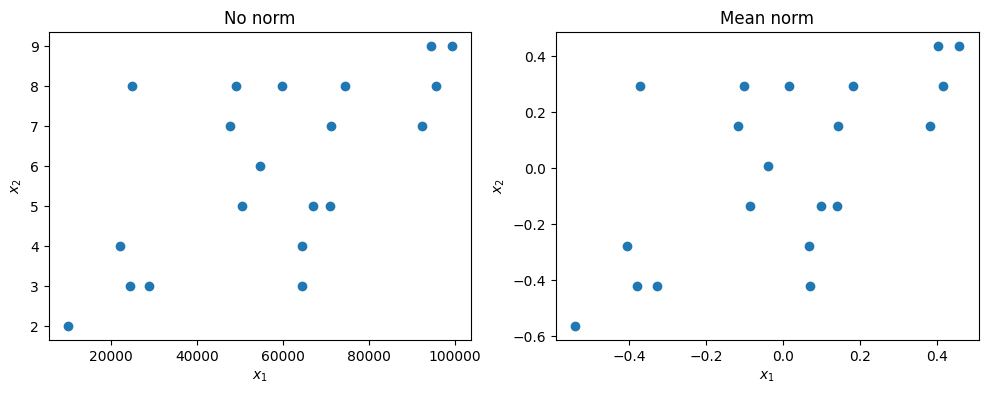

In [22]:
def mean_norm(xvec):
    return (xvec - np.mean(xvec)) / (np.max(xvec) - np.min(xvec))

x_1 = np.random.randint(0, 100000, (20,))
x_2 = np.random.randint(0, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Mean norm")
ax[1].plot(mean_norm(x_1), mean_norm(x_2), linestyle="",marker="o")

#### Linear
Given $\vec{x}$, this method subtracts the smallest value within $\vec{x}$, then divides by the difference between the largest and smallest values within $\vec{x}$. It works when the feature is uniformly distributed (evenly spaced) across a range. Results are guaranteed to be between 0 and 1. It is sometimes called "min max" normalization as well.

$$
\vec{x}' = \frac{\vec{x}-x_{min}}{x_{max}-x_{min}}
$$

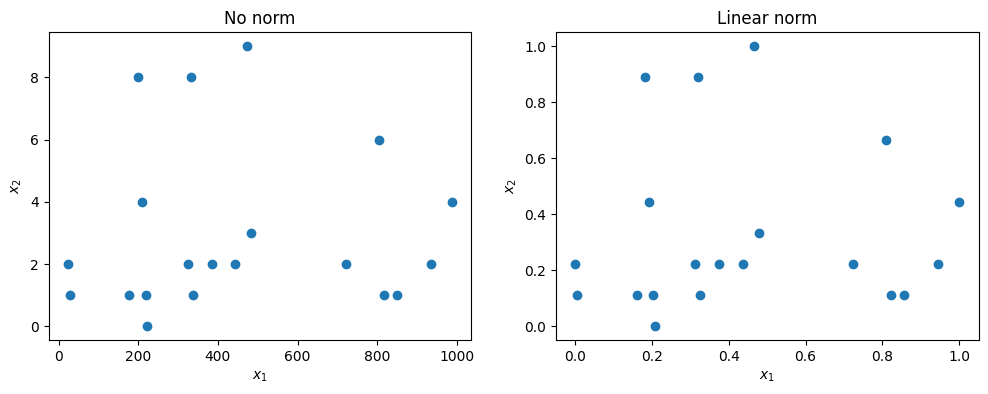

In [34]:
def linear_norm(xvec):
    return (xvec - np.min(xvec)) / (np.max(xvec) - np.min(xvec))

x_1 = np.random.randint(0, 1000, (20,))
x_2 = np.random.randint(0, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Linear norm")
ax[1].plot(linear_norm(x_1), linear_norm(x_2), linestyle="",marker="o")

#### Logarithmic
Given $\vec{x}$ and a user-specific log base $b$, this method applies a logarithm to "power law" feature values (ie, it looks like $f(x) = \frac{1}{x}$ on a plot). The result is data better suited to linear arithmetic. Cannot be used with input value of 0 unless this case is explicitly handled in the implementation.

$$
\vec{x}' = \log_b(\vec{x})
$$

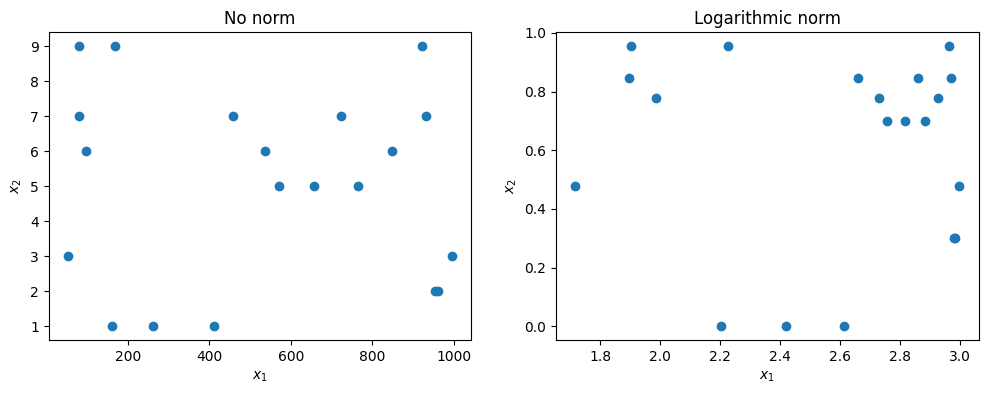

In [37]:
def logarithmic_norm(xvec, base=10):
    return np.emath.logn(base, xvec)

x_1 = np.random.randint(1, 1000, (20,))
x_2 = np.random.randint(1, 10, (20,))

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("$x_2$")
ax[0].set_xlabel("$x_1$")
ax[0].set_title("No norm")
ax[0].plot(x_1, x_2, linestyle="",marker="o")

ax[1].set_ylabel("$x_2$")
ax[1].set_xlabel("$x_1$")
ax[1].set_title("Logarithmic norm")
ax[1].plot(log_norm(x_1), logarithmic_norm(x_2), linestyle="",marker="o")

#### Batch
Just as with $X$, layered outputs within a neural network can be normalized. It is possible to apply this normalization to the linear output $Z^{[l]}$ or the activation output $A^{[l]}$, although it is more commonly applied to $Z^{[l]}$. You could replace all instances of $Z^{[l]}$ with $A^{[l]}$ in these equations to batch normalize the results after activation.

For every feature $_j$ of $Z^{[l]}$ (which corresponds to a unit in that layer), compute the mean $\mu$ and variance $\sigma^2$.

$$
\begin{align}
\mu & = \frac{1}{m} \cdot \sum\limits_{j=1}^m Z^{[l]}_j \\
\sigma^2 & = \frac{1}{m} \cdot \sum\limits_{j=1}^m (Z^{[l]}_j - \mu)^2 \\
\end{align}
$$

Then, normalize $Z^{[l]}_j$ to yield $Z^{[l]norm}_j$ which has a mean of 0 in a variance of 1 for each feature. The presence of $\varepsilon$ is for numeric stability and has an infinitesimal impact on the mean and variance just described. Two additional per-layer parameters, $\gamma^{[l]}$ and $\beta^{[l]}$, are introduced to further transform the result. To retain a mean of zero, in a variance of one, use $\gamma^{[l]}=1$ and $\beta^{[l]}=0$. To nullify the batch normalization process entirely, use $\gamma^{[l]}=\sqrt{\sigma^2 + \varepsilon}$ and $\beta^{[l]}=\mu$. Like the weights $W^{[l]}$ and biases $b^{[l]}$, $\gamma^{[l]}$ and $\beta^{[l]}$ are learnable. Finally, all of $\tilde{Z}^{[l]}$ becomes an input to the activation function $g()$ and the process continues as usual.

$$
\begin{align}
Z^{[l]norm}_j & = \frac{Z^{[l]}_j - \mu}{\sqrt{\sigma^2 + \varepsilon}} \\
\tilde{Z}^{[l]}_j & = (\gamma^{[l]} \cdot Z^{[l]norm}_j) + \beta^{[l]} \\
A^{[l+1]} & = g(\tilde{Z}^{[l]})
\end{align}
$$

Note that bias $b^{[l]}$ becomes irrelevant with batch normalization because the mean $\mu$ is set to 0. Instead, $\beta^{[l]}$ serves as the per-unit offset. You can either set all biases to 0 or remove it from your algorithm entirely. Like the bias matrix $b^{[l]}$, both $\gamma^{[l]}$ and $\beta^{[l]}$ are applied unit-wise and thus have a shape of $(n_l, 1)$. Additionally, batch normalization has a slight regularizing effect when combined with mini-batch gradient descent. Due to the scaling by the mean $\mu$ and variance $\sigma^2$ of a mini-batch (which doesn't represent all of $X$), the precise activation values become noisier. The smaller the mini-batch size, the greater the regularization effect.

To make predictions when mini-batches are use, we must estimate $\mu$ and $\sigma^2$ since the values computed for a single mini-batch cannot be used at test time. Instead, use an EWMA across the $\mu$ and $\sigma^2$ values for each mini-batch. These are non-learnable parameters of the algorithm.

### Weight Initialization

#### Overview
Proper initialization of weights is necessary to prevent exploding and vanishing gradient problems in deep neural networks (those with many layers). Derivatives used during back propagation can become too large (exploding), which causes divergence, if the weights are initialized too large. They can also become too small (vanishing), which causes an inability to converge, if the weights are initialized too small. Initializing the weights with values slightly less than 1 and slightly greater than 1 mitigates the problem, although does not completely solve it.

Additionally, weight initialization avoids the "symmetry" problem whereby by every units learns the same thing, reducing the entire neural network to a single unit. Such a model is only as powerful as linear or logistic regression in isolation. Note that you can also initialize biases the same way. It is common to initialize biases to zero as this will not inhibit a model's ability to learn.

In the formulas that follow, $\mathcal{N}$ refers to a normal (Gaussian) distribution of random values matching the proper matrix shape at a given layer.

#### Xavier
This method works best on layers using the linear, sigmoid, tanh, or softmax activation functions. As $n_{l-1}$ increases (which represents a more populous previous layer), the resulting vector values creep closer to zero.

$$
W^{[l]}_{init} = \mathcal{N} \cdot \sqrt{\frac{1}{n_{l-1}}}
$$

In [24]:
norm = np.random.randn(2, 5)
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}\n{norm * np.sqrt(1/prev_n)}")

norm distro
[[ 0.81864815 -0.36756374  0.57888394 -1.17114903  0.35019266]
 [ 1.80808102  0.28277911  3.44489369  0.17367235 -0.02109767]]

n_l-1 = 10
[[ 0.25887928 -0.11623386  0.18305918 -0.37034984  0.11074064]
 [ 0.57176542  0.08942261  1.08937103  0.05492002 -0.00667167]]

n_l-1 = 20
[[ 0.18305529 -0.08218975  0.12944238 -0.26187689  0.07830546]
 [ 0.40429921  0.06323133  0.77030165  0.03883432 -0.00471758]]

n_l-1 = 50
[[ 0.11577433 -0.05198136  0.08186655 -0.16562548  0.04952472]
 [ 0.25570127  0.039991    0.48718154  0.02456098 -0.00298366]]


#### Normalized Xavier
This method is similar to Xavier except it considers both the input and output unit counts (sometimes called "fan in" and "fan out") between layers. If these two terms are equal, it yields identical results as Xavier. As the $(n_{l-1} + n_l)$ denominator term increases, the resulting vector values creep closer to zero.

$$
W^{[l]}_{init} = \mathcal{N} \cdot \sqrt{\frac{2}{n_{l-1} + n_l}}
$$

In [25]:
norm = np.random.randn(2, 5)
cur_n = 20
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}, n_l = {cur_n}\n{norm * np.sqrt(2/(prev_n + cur_n))}")

norm distro
[[ 0.35772436 -0.34208448 -0.11469337 -0.73463898  0.2759994 ]
 [ 0.7148769  -0.24277462  0.650629    0.63207323  0.9340581 ]]

n_l-1 = 10, n_l = 20
[[ 0.09236403 -0.08832583 -0.0296137  -0.18968297  0.07126274]
 [ 0.18458042 -0.06268414  0.16799169  0.16320061  0.24117276]]

n_l-1 = 20, n_l = 20
[[ 0.0799896  -0.07649241 -0.02564622 -0.16427027  0.06171534]
 [ 0.15985133 -0.05428605  0.14548507  0.14133587  0.20886174]]

n_l-1 = 50, n_l = 20
[[ 0.06046645 -0.05782283 -0.01938672 -0.12417665  0.04665241]
 [ 0.12083625 -0.0410364   0.10997637  0.10683988  0.15788463]]


#### He 何
This method works best on layers using the ReLU activation function (and its variants). It is very similar to Xavier except uses 2 as the numerator instead of 1. This yields slightly smaller movements towards zero when compared to Xavier given the larger numerator.

$$
W^{[l]}_{init} = \mathcal{N} \cdot \sqrt{\frac{2}{n_{l-1}}}
$$

In [30]:
norm = np.random.randn(2, 5)
print(f"norm distro\n{norm}")
for prev_n in np.array([10, 20, 50]):
    print(f"\nn_l-1 = {prev_n}\n{norm * np.sqrt(2/prev_n)}")

norm distro
[[-1.1373844   0.46465876 -0.57248895  0.16195855  1.32836365]
 [-0.11243882 -0.85070718 -0.8383678   0.5997525  -0.20800406]]

n_l-1 = 10
[[-0.50865377  0.20780172 -0.25602484  0.07243006  0.59406228]
 [-0.05028417 -0.38044782 -0.37492948  0.26821747 -0.09302224]]

n_l-1 = 20
[[-0.35967253  0.146938   -0.1810369   0.05121579  0.42006547]
 [-0.03555628 -0.26901723 -0.26511518  0.18965839 -0.06577666]]

n_l-1 = 50
[[-0.22747688  0.09293175 -0.11449779  0.03239171  0.26567273]
 [-0.02248776 -0.17014144 -0.16767356  0.1199505  -0.04160081]]


### Activation Functions

#### Overview
This section describes activation functions applied to the linear outputs $Z$ to yield $A$, plus their derivatives. Note that the following generic, non-annotated, non-vectorized formula is true for all activations. The superscripts and subscripts may vary as the context changes. This equation is not repeated for individual activation summaries below.

$$
z = w \cdot x + b
$$

#### Linear/None
Returns the input $z$ unchanged. Not useful in a hidden layer, but could be used at the final layer for linear regression.

$$
\begin{align}
g(z) & = z \\
\frac{\partial g(z)}{\partial z} & = 1
\end{align}
$$

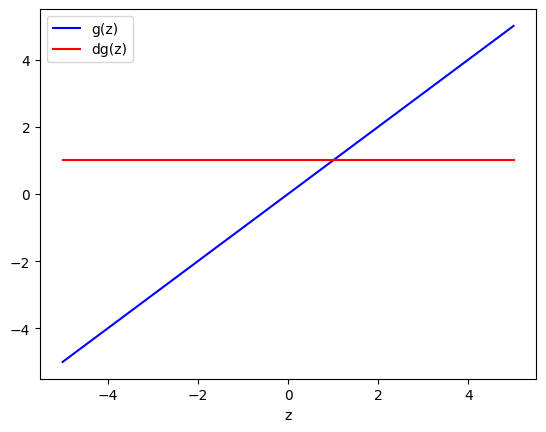

In [34]:
def g_linear(z):
    return z

def dg_linear(z):
    return np.ones(z.shape)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_linear(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_linear(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Sigmoid
Returns values between 0 and 1 with most values being close to those two asymptotes. This value corresponds to the probability that $y = 1$. Typically used in the final layer for logistic regression (binary classification).

$$
\begin{align}
g(z) & = \frac{1}{1+e^{-z}} \\
\frac{\partial g(z)}{\partial z} & = g(z) \cdot (1 - g(z))
\end{align}
$$

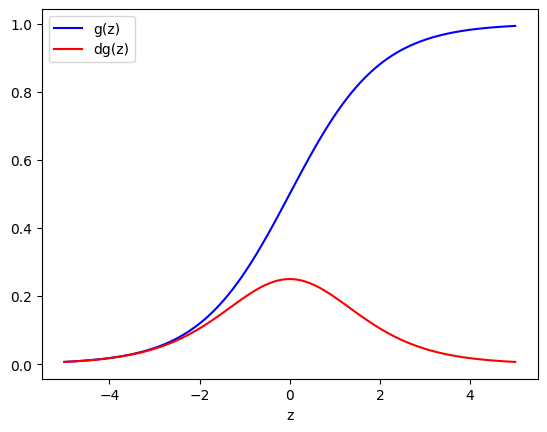

In [33]:
def g_sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dg_sigmoid(z):
    gz = g_sigmoid(z)
    return np.multiply(gz, 1 - gz)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_sigmoid(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_sigmoid(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Rectified Linear Unit (ReLU)
Like the linear activation, returns the input $z$ unchanged when $z$ is positive. When $z$ is negative, returns 0. The function is technically undefined when $z = 0$, but most implementations will return 0 for simplicity.

$$
\begin{align}
g(z) = &
\begin{cases}
z \lt 0: & 0 \\
z \ge 0: & z
\end{cases} \\
\frac{\partial g(z)}{\partial z} = &
\begin{cases}
z \lt 0: & 0 \\
z \ge 0: & 1
\end{cases}
\end{align}
$$

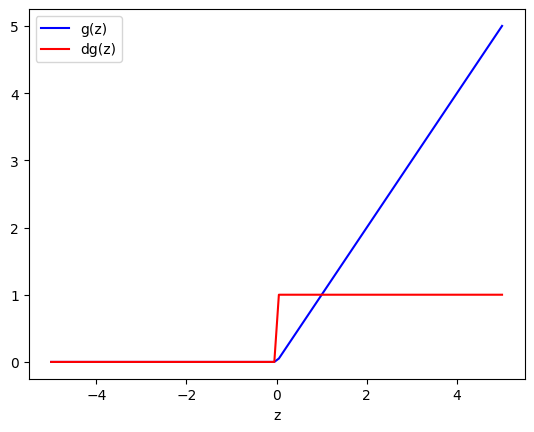

In [35]:
def g_relu(z):
    return z * (z > 0)

def dg_relu(z):
    return 1.0 * (z > 0)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_relu(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_relu(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Leaky ReLU
Like the ReLU activation, except when $z$ is negative, returns a small positive number. This allows $z$ values to be preserved but heavily discounted.

$$
\begin{align}
g(z) = &
\begin{cases}
z \lt 0: & 0.01z \\
z \ge 0: & z
\end{cases} \\
\frac{\partial g(z)}{\partial z} = &
\begin{cases}
z \lt 0: & 0.01 \\
z \ge 0: & 1
\end{cases}
\end{align}
$$

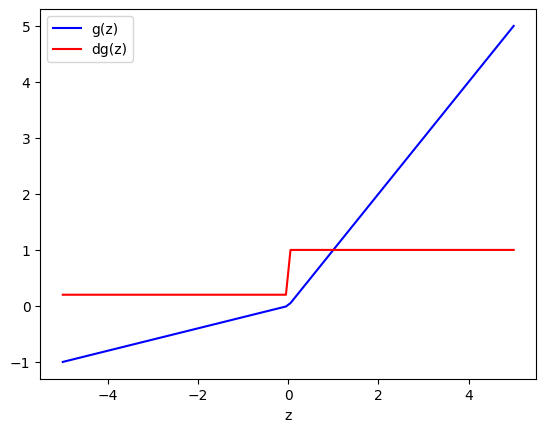

In [4]:
# Note: Large neg_slope used for visual aid only

def g_leakyrelu(z, neg_slope=0.2):
    return np.where(z > 0, z, neg_slope * z)

def dg_leakyrelu(z, neg_slope=0.2):
    return np.where(z > 0, 1, neg_slope)

z_in = np.linspace(-5, 5, 100)
plt.plot(z_in, g_leakyrelu(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_leakyrelu(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Hyperbolic tangent (tanh)
Similar in shape to the sigmoid function, it returns values between -1 and 1. The theoretical mean of the activation results is closer to 0, compared to 0.5 with sigmoid.
$$
\begin{align}
g(z) & = \frac{e^z - e^{-z}}{{e^z} + e^{-z}} \\
\frac{\partial g(z)}{\partial z} & = 1 - g(z)^{2}
\end{align}
$$

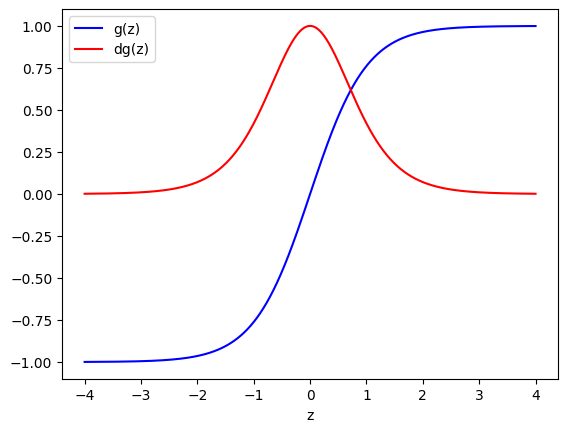

In [45]:
def g_tanh(z):
    epz = np.exp(z)
    enz = np.exp(-z)
    return (epz - enz)/(epz + enz)

def dg_tanh(z):
    return 1 - np.square(g_tanh(z))

z_in = np.linspace(-4, 4, 10000)
plt.plot(z_in, g_tanh(z_in), color="b", label="g(z)")
plt.plot(z_in, dg_tanh(z_in), color="r", label="dg(z)")
plt.xlabel("z"); plt.legend(); plt.show()

#### Softmax
Across $k$ units (classes) in a layer, returns values between 0 and 1 corresponding to the probability of a match for each class. The sum of all activation values is one. Typically used in the final layer for softmax regression (multiple class classification). Cannot be easily visualized as it typically has many dimensions.

$$
\begin{align}
g(z_{j}) & = \frac{e^{z_{j}}}{\sum^{n}_{k=1}{e^{z_{k}}}} = P(y = j|\vec{x}) \\
\frac{\partial g(z_{j})}{\partial z_{j}} & = g(z_{j}) \cdot (1 - g(z_{j})) \\
\frac{\partial g(z_{j})}{\partial z_{k}} & = -g(z_{j}) \cdot g(z_{k})
\end{align}
$$

### Model Evaluation

#### Overview
This section describes the criteria for identifying underfitting and overfitting models. Definitions:
  1. $J_{bayes}$: theoretically lowest possible cost (Bayes error)
  2. $J_{human}$: human baseline performance
  3. $J_{train}$: total cost of training set $X_{train}$
  4. $J_{cv}$: total cost of cross validation (aka development or dev) set $X_{cv}$

Examples of $X$ should be shuffled between these three sets, especially if they come from different distributions. This may include different sources (real vs. synthetic, official database vs. social media, etc), different geographical regions, or any other differentiating factor. This is especially important with respect to the cross validation and test sets.

Selection of a model is based on two types of metrics:
  1. __Optimizing__: the single metric that should be improved to the greatest degree. For example, maximizing accuracy or minimizing false positives.
  2. __Satisficing__: the remaining metrics that must be satisfied, but not necessarily optimized. For example, ensuring that predictions take less than 10 seconds or ensuring that the model fits into 200 megabytes of memory space.

Given these metrics, use the __evaluation criteria__ to intelligently combine them. First, find all models that meet the satisficing metrics. Of those models, select the one with the best optimizing metric. Suppose that accuracy is the optimizing metric while prediction time and memory consumption are satisficing metrics. Following this process, model D is superior in the example table below.

|                | Accuracy % | Pred time (s) | Mem con (MB) | Analysis           |
| -------------- | ---------- | ------------- | ------------ | ------------------ |
| Eval criteria  | $\ge$ 95   | $\le$ 10      | $\le$ 200    |                    |
| Model A        | 100        | 5             | 1500         | mem con too high   |
| Model B        | 99         | 30            | 75           | pred time too high |
| Model C        | 93         | 5             | 150          | accuracy too low   |
| Model D        | 97         | 9             | 190          | best option        |

Use the plots below to help visualize the concepts discussed in the following texts.

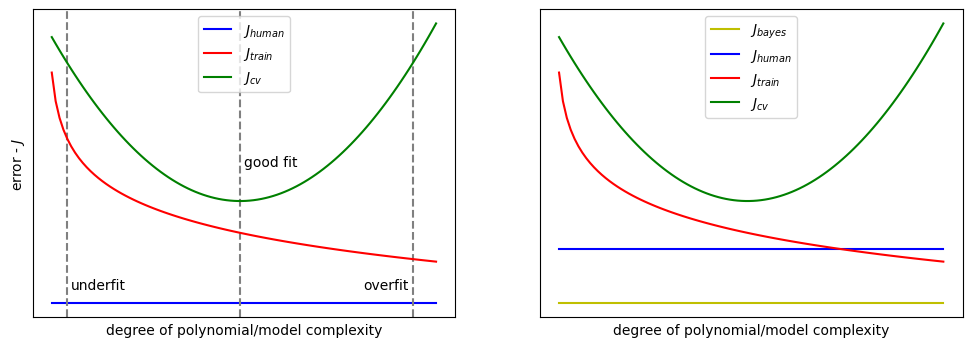

In [26]:
# Note: imprecise numbers and curves; conceptual only
error_in = np.linspace(0.1, 10.1, 100)
desc = []

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("error - $J$")

ax[0].plot(error_in, np.ones(error_in.shape), color="b", label="$J_{human}$")
ax[0].axvline(x=5, color="gray", linestyle="--"); ax[0].text(5.1,2,"good fit")
ax[0].axvline(x=9.5, color="gray", linestyle="--"); ax[0].text(8.2,1.1,"overfit")
ax[0].axvline(x=0.5, color="gray", linestyle="--"); ax[0].text(0.6,1.1,"underfit")

ax[1].plot(error_in, np.ones(error_in.shape), color="y", label="$J_{bayes}$")
ax[1].plot(error_in, np.ones(error_in.shape) + 0.4, color="b", label="$J_{human}$")

for axis in ax:
    axis.plot(error_in, -np.log(error_in) * 0.3 + 2, color="r", label="$J_{train}$")
    axis.plot(error_in, 0.05 * np.square(error_in) - error_in/2 + 3, color="g", label="$J_{cv}$")
    axis.set_xlabel("degree of polynomial/model complexity")
    axis.set_xticks([]); axis.set_yticks([]); axis.legend()

#### Test for "good" fit
If the errors of the training and cross validation sets are close to the human baseline, the model is a good fit. Both the bias and variance are low.

$$
J_{human} \approx J_{train} \approx J_{cv}
$$

Note that the human baseline error may still be significantly better than the training and cross validation errors. This is acceptable if the training and cross validation errors are tolerably low and do not suggest an underfit.

$$
J_{human} \lesssim J_{train} \lesssim J_{cv}
$$

It is sometimes possible to surpass human performance. The theoretical minimum cost is the Bayes error rate (also called Bayes optimal error) which can never be surpassed. However, once the model's performance reaches this point, progress becomes much slower. Determining what to change is difficult because there is no obvious baseline against which to compare.

$$
J_{human} \gtrsim J_{train} \gtrsim J_{cv}
$$

#### Test for underfit
If the error of the training set is far higher than human baseline, and the error of the cross validation set is equally high, the model has underfitted to the training set. The model consistently makes poor predictions on any kind of input. Consider adding features, creating polynomial features to match more complex curves, or removing/decreasing regularization. It is not recommended to remove training examples at random. Also known as "high bias".

$$
\begin{align}
J_{human} & \ll J_{train} \\
J_{train} & \approx J_{cv}
\end{align}
$$

Note that $J_{train} - J_{human}$ is called "avoidable" bias because it is theoretically possible to eliminate via training.

#### Test for overfit
If the error of the training set is close to the human baseline, but the error of the cross validation set is far higher than both, the model has overfitted to the training set. It will likely generalize poorly to unseen inputs and make inaccurate predictions. Consider adding training examples, removing features, or applying/increasing regularization. Also known as "high variance".

$$
\begin{align}
J_{human} & \approx J_{train} \\
J_{train} & \ll J_{cv}
\end{align}
$$

You can approximate the variance by computing $J_{cv} - J_{train}$ which can theoretically be reduced, similar to avoidable bias.

#### Test for "worst" fit
If the error of the training set is far higher than human baseline, and the error of the cross validation set is far higher the training error, the model exhibits high bias and high variance simultaneously. This is a rare case that appears impossible to depict in two dimensions. Compute the avoidable bias and variance using the subtraction formulas above and first solve whichever is larger.

$$
J_{human} \ll J_{train} \ll J_{cv}
$$

#### Skewed Data Sets
Maximizing accuracy (minimizing error) is a good measure of success for regression models and classification models with uniform/diverse data sets. However, it is a poor choice for assessing classification models with skewed data sets. A model can be highly accurate by simply predicting $\hat{y}=1$ every single time if the data sete contains very few $y=0$ labels, or vice versa.

A "confusion matrix" has shape $(k, k)$ whereby the $k$ is the number of classes. Assuming binary classification, the shape is $(2, 2)$. The rows and columns represent all possible values and the intersecting cells enumerate the permutations. Assign the results of each training example into one of these four categories. From this, compute accuracy $A$, precision $P$, and recall $R$.

|             | $y=1$          | $y=0$          |
| ----------- |----------------| -------------- |
| $\hat{y}=1$ | true positive  | false positive |
| $\hat{y}=0$ | false negative | true negative  |

As an example, suppose this model predicts whether a patient has a rare and deadly disease.

Accuracy $A$: for each training example, how often was the model correct $y=\hat{y}$? Total the number of "true" values then divide by the total.

$$
A = \frac{true\_pos + true\_neg}{true\_pos + true\_neg + false\_pos + false\_neg}
$$

Precision $P$: for each prediction of true $(\hat{y}=1)$, how often did the model correctly diagnose the disease $(y=1)$? A high precision indicates that the model rarely misdiagnoses a healthy person; the number of false positives will be small.

$$
P = \frac{true\_pos}{true\_pos + false\_pos}
$$

Recall $R$ : for each patient with the disease $(y=1)$, how often did the model correct predict the disease's presence $(\hat{y}=1)$? A high recall indicates that the model rarely forgets to include a sick person; the number of false negatives will be small.

$$
R = \frac{true\_pos}{true\_pos + false\_neg}
$$

Much like bias and variance, precision and recall must be traded off. In some cases, one metric is more important than the other. As it relates to a rare disease, recall is more important. This ensures the model does not fail to identify a sick patient (fewer false negatives), although this will likely lead to more healthy patients being misdiagnosed (more false positives). In the context of logistic regression, you would select a threshold less than 0.5, leading to a larger share of positive predictions $(\hat{y}=1)$. A bank lending money to a borrower may prefer high precision. It is less important for the bank lend to all borrowers of interest, but more important that the selected borrowers are capable of repayment. The logistic regression threshold would be increased above 0.5 here.

Another way to think about this is in the context of business/personal costs. Maximizing precision is important when the cost of action is high (lending money to a stranger), but the cost of inaction is low (plenty of other candidates exist). Maximizing recall is important when the cost of action is low (treatment for the disease), but the cost of inaction is high (diminished health or death).

#### F-score
This algorithm helps with the analysis and selection of models. The hyperparameter $\beta \in \mathbb{R}\,|\,\beta > 0$ controls the relative importance of precision and recall.

$$
F_\beta = (1 + \beta^2) \cdot \frac{P \cdot R}{(\beta^2 \cdot P) + R}
$$

Although $\beta$ can vary widely, three F-scores are most commonly used:
  1. $F_1$-score: evenly balance the impact of precision and recall. Good for general-purpose use when there isn't an obvious preference. It provides greater weight to whichever value is lower, believing that a balanced model is better than a lobsided one.

$$
F_1 = 2 \cdot \frac{P \cdot R}{P + R}
$$

  2. $F_2$-score: gives greater weight to recall over precision. Good for the rare disease example.

$$
F_2 = 5 \cdot \frac{P \cdot R}{(4 \cdot P) + R}
$$

  3. $F_{0.5}$-score: gives greater weight to precision over recall. Good for the bank lending example.

$$
F_{0.5} = 1.25 \cdot \frac{P \cdot R}{(0.25 \cdot P) + R}
$$

Consider four scenarios arrayed side by side, each representing a model trained with 100 examples.

  1. This model performs well in both categories with a slightly higher recall than precision because there are more false positives than false negatives.
  2. This model has good precision but poor recall given the small number of false positives and large number of false negatives.
  3. This model has poor precision but good recall given the large number of false positives and small number of false negatives.
  4. This model performs poorly by all measures with many false positives false negatives.

| Scenario 1  | $y=1$        | $y=0$         | Scen 2  | $y=1$ | $y=0$  | Scen 3  | $y=1$ | $y=0$  | Scen 4  | $y=1$ | $y=0$  |
| ----------- |--------------| ------------- | ------- |-------| ------ | ------- |-------| ------ | ------- |-------| ------ |
| $\hat{y}=1$ | true pos: 50 | false pos: 10 |         | 30    | 5      |         | 40    | 20     |         | 35    | 20     |
| $\hat{y}=0$ | false neg: 5 | true neg: 35  |         | 25    | 40     |         | 5     | 35     |         | 25    | 15     |

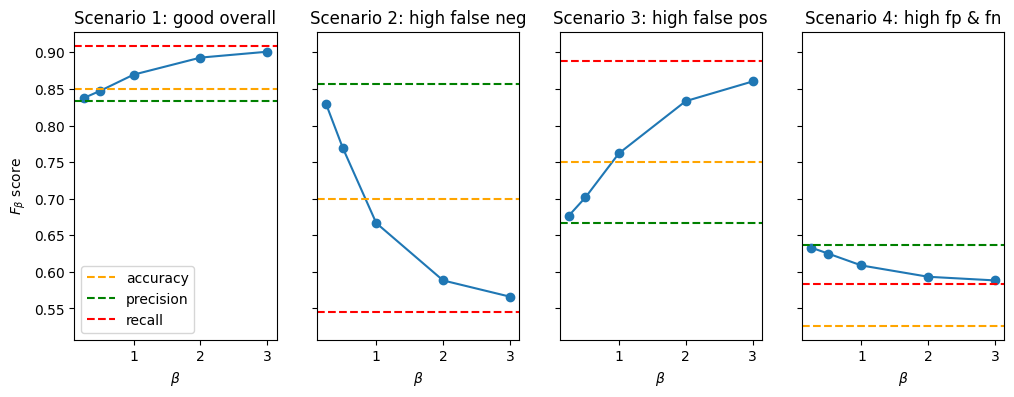

In [17]:
scenario = np.array([[50, 10, 5, 35], [30, 5, 25, 40], [40, 20, 5, 35], [35, 20, 25, 15]])
desc = ["good overall", "high false neg", "high false pos", "high fp & fn"]
beta = np.array([0.25, 0.5, 1.0, 2.0, 3.0])

def accuracy(tp, fp, fn, tn): return (tp + tn) / (tp + tn + fp + fn)
def precision(tp, fp): return tp / (tp + fp)
def recall(tp, fn): return tp / (tp + fn)
def fbeta_score(P, R, B): return (1 + B**2) * ((P * R) / ((B**2 * P) + R))

fig, ax = plt.subplots(nrows=1, ncols=len(scenario), sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel(r"$F_{\beta}$ score")

for i in range(len(scenario)):
    A = accuracy(*scenario[i])
    P = precision(scenario[i, 0], scenario[i, 1])
    R = recall(scenario[i, 0], scenario[i, 2])
    fscore = np.array([fbeta_score(P, R, B) for B in beta])
    ax[i].set_title(f"Scenario {i+1}: {desc[i]}")
    ax[i].plot(beta, fscore, marker="o")
    ax[i].axhline(y=A, color="orange", linestyle="--", label="accuracy")
    ax[i].axhline(y=P, color="green", linestyle="--", label="precision")
    ax[i].axhline(y=R, color="red", linestyle="--", label="recall")
    ax[i].set_xlabel(r"$\beta$");

ax[0].legend()

### Regularization

#### Overview
This section contains techniques to regularize (desensitize) an overfitted model. Regularization reduces the impact of the weights applied to each feature, sometimes entirely eliminating features. Note that this only applies to training, not predictions.

Use this conceptual plot to see how $\lambda$ impacts the quality of a model's fit to various data sets.

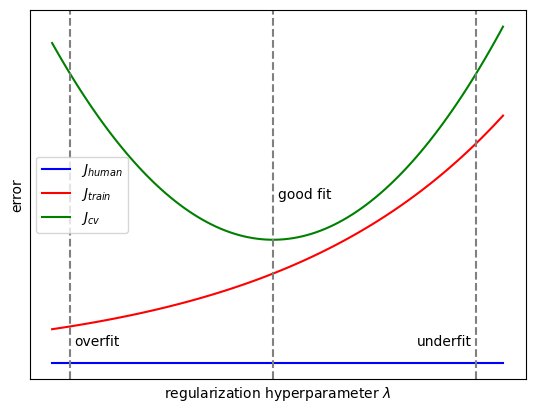

In [26]:
# Note: imprecise numbers and curves; conceptual only
error_in = np.linspace(0.1, 10.1, 100)
plt.plot(error_in, np.ones(error_in.shape), color="b", label="$J_{human}$")
plt.plot(error_in, np.exp(error_in/5)/5 + 1, color="r", label="$J_{train}$")
plt.plot(error_in, 0.05 * np.square(error_in) - error_in/2 + 3, color="g", label="$J_{cv}$")
plt.axvline(x=5, color="gray", linestyle="--"); plt.text(5.1,2,"good fit")
plt.axvline(9.5, color="gray", linestyle="--"); plt.text(8.2,1.1,"underfit")
plt.axvline(0.5, color="gray", linestyle="--"); plt.text(0.6,1.1,"overfit")
plt.xticks([]); plt.yticks([])
plt.xlabel("regularization hyperparameter $\lambda$"); plt.ylabel("error"); plt.legend(); plt.show()

#### LASSO (L1 norm)
Short for Least Absolute Shrinkage and Selection Operator. It sums the absolute values of the weights and can perform automatic feature selection by applying a weight of 0 to certain features. Use this method when there are many useless/nonpredictive features.

General definition:

$$
\|W\|_{1}=\lambda \cdot {\sum\limits^{n}_{i=1}{|W_{n}|}}
$$

Adaptation to combine with a given cost function, and its derivative with respect to a specific weight $w_j$, as the "regularization term". Note that $|w_j|$ cannot be derivated (and thus cannot be represented in closed-form) as the function is not continuous.

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{1}{m} \cdot \|\vec{w}\|_{1}\biggr) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{\lambda}{m} \cdot {\sum\limits^{n}_{i=1}{|\vec{w}_{n}|}}\biggr) \\
\frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) & := \frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) +
\frac{\lambda}{m} \cdot
\begin{cases}
w_j \neq 0: & \frac{w_j}{|w_j|} \\
w_j = 0: & \text{undefined}
\end{cases}
\end{align}
$$

#### Ridge (L2 norm)
It sums the squares of the weights. Use this method to reduce the impact of weights without eliminating them entirely. Ridge is more commonly used than LASSO for this reason. It's also called the Frobenius norm.

General definition:

$$
\|W\|_{2}=\lambda \cdot {\sum\limits^{n}_{i=1}{(W_{n})^2}}
$$

Adaptation to combine with a given cost function, and its derivative with respect to a specific weight $w_j$, as the "regularization term":

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{1}{2m} \cdot \|\vec{w}\|_{2}\biggr) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & := J_{\vec{w},b}(\vec{x}^{(i)}) +
\biggl(\frac{\lambda}{2m} \cdot {\sum\limits^{n}_{i=1}{(\vec{w}_{n})}^2}\biggr) \\
\frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) & := \frac{\partial}{\partial w_j}J_{\vec{w},b}(\vec{x}^{(i)}) +
\frac{\lambda}{m} \cdot w_j
\end{align}
$$

#### Dropout
Randomly deactivate certain units in a neural network layer for a given iteration of gradient descent. This makes layers more sparse and the remaining units are trained normally. When applied, the model cannot rely heavily on a single feature as the weight values are spread out. Dropout is commonly used in computer vision as there is rarely enough data, making overfitting common.

Most implementations define a `keep_prob` input, identifying the probability that any given unit remains in service. Other implementations define a `drop_prob` input, identifying the probability that any given unit is dropped from service. Focusing on the `keep_prob` logic, the range is $\{p \in \mathbb{R}\,|\,0 \lt p \le 1\}$. Setting `keep_prob = 1` disables dropout. It is specified on a per-layer basis, and it typically limited to hidden layers. Applying dropout to the input layer means discarding entire features. Applying dropout to the output layer means discarding categorical classes in a softmax regression, for example.

It is also common to divide the resulting activation matrix $A$ by the `keep_prob` so that the activation values more closely resemble results from the "full" layer. This specific implementation is known as "inverted dropout".

Because the neural network is different at each iteration of gradient descent, there is no well-defined cost function. Thus, the training and cost cannot be plotted to ensure it continuously decreases. To troubleshoot a model using dropout, set `keep_prob = 1` to temporarily disable dropout, ensure the cost function decreases at each iteration, then re-enable it.


#### Other Techniques
Overfitting can sometimes be solved by supplying additional training examples. Sometimes, sufficient data simply does not exist. Instead, you can create additional examples that are realistic representations of real data. Using the computer vision example, you can flip a picture horizontally or vertically, or perform slight rotations, to create variants of an existing image. Other distortions, such as crops, stretches, and minor color changes can also help. Not all of these techniques are universally valid. For example, if you are training a model to recognize human faces, you would not flip images vertically as it would yield upside down faces. Synthesizing training examples is not mutually exclusive with the aforementioned regularization methods.

You can also stop the gradient descent process early, preferably when the difference between the cross-validation error and training error is minimized. This is depicted as "good fit" in the conceptual plot. First, train the model and plot both the training and cross-validation error curves. Then, find the required minimum and stop the process after the correct number of iterations. The drawback of this solution is that it is tightly couples the training and regularization processes. It limits future options because if you want to modify the training process, you may also inadvertently impact the regularization process. Many experts prefer to use a dedicated regularization method to separate these two efforts (ie, to keep them orthogonal).

### Forward Propagation

#### Overview
This section describes the prediction/inference process of a neural network.

#### Computing Z
Each unit performs two steps in series. First, the linear outputs are computed using the formula below. The dot product of matrices $W^{[l]}$ and $A^{[l-1]}$ yields a matrix of shape $(n_l,n_{l-1}) \bullet (n_{l-1},m) = (n_l,m)$. In order for matrix multiplication to work, the number of columns in $W^{[l]}$ must match the number of rows in $A^{[l-1]}$, which is always equal to the number of units in the previous layer $n_{l-1}$. Adding the column vector $b^{[l]}$ retains the same shape, but applies the bias values on a per column basis. Superscript $[l]$ notations are omitted from the individual matrix elements for cleanliness.

$Z^{[l]} = W^{[l]} \bullet A^{[l-1]} + b^{[l]}$

First layer matrix expansion for $X = A^{[0]}$.

$$
\begin{align}
Z^{[1]} & = 
\begin{bmatrix}
z^{(1)}_1 & z^{(2)}_1 & \cdots & z^{(m)}_1 \\
z^{(1)}_2 & z^{(2)}_2 & \cdots & z^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
z^{(1)}_{n_l} & z^{(2)}_{n_l} & \cdots & z^{(m)}_{n_l}
\end{bmatrix}
{=}
\begin{bmatrix}
w_{1,1} & w_{1,2} & \cdots & w_{1,n_{l-1}} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,n_{l-1}} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1} & w_{n_l,2} & \cdots & w_{n_l,n_{l-1}}
\end{bmatrix}
\bullet
\begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \ddots & \vdots \\
x^{(1)}_{n_0} & x^{(2)}_{n_0} & \cdots & x^{(m)}_{n_0}
\end{bmatrix}
{+}
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_{n_l}
\end{bmatrix} \\
Z^{[1]} & = 
\begin{bmatrix}
% first row
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(1)}_j)} + b_1 &
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(2)}_j)} + b_1 & \cdots & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{1,j} \cdot x^{(m)}_j)} + b_1 \\
% second row
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(1)}_j)} + b_2 & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(2)}_j)} + b_2 & \cdots &
\sum\limits^{n_{l-1}}_{j=1}{(w_{2,j} \cdot x^{(m)}_j)} + b_2 \\
% third row
\vdots & \vdots & \ddots & \vdots \\
% fourth row
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(1)}_j)} + b_{n_l} & 
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(2)}_j)} + b_{n_l} & \cdots &
\sum\limits^{n_{l-1}}_{j=1}{(w_{n_l,j} \cdot x^{(m)}_j)} + b_{n_l}
\end{bmatrix}
\end{align}
$$

#### Computing A

Matrix $Z$ serves as the input for the activation function $g$. The result is the activation matrix $A$ which is the same shape as $Z$ because the activation function acts element-wise on $Z$. Activation functions may vary between layers, hence the $[l]$ superscript applied to $g$. Note that $A^{[0]} = X$ and $A^{[L]} = \hat{Y}$ for a neural network with $L$ layers.

$$
g^{[l]}(Z^{[l]}) = A^{[l]}
$$

### Cost Functions

#### Overview
This section describes common cost functions and their derivatives. Computing the cost happens after a prediction is made (forward propagation) and seeds the process of training the model (backward propagation and gradient descent).

#### Mean Squared Error (MSE)
Primarily used for regression problems, such as predicting a continuous value rather than a classification. There is only a single global minimum due to its convex shape (no local minima), assuming linear activation.

$$
\begin{align}
\hat{y}^{(i)} & = \vec{w} \bullet \vec{x}^{(i)} + b \\
J_{w,b}(x^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\end{align}
$$

The cost function can be partially derivated with respect to $W$ and $b$:

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\frac{\partial}{\partial w}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \cdot \vec{x}^{(i)} \\
\frac{\partial}{\partial b}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \\
\end{align}
$$

#### Binary Cross Entropy
Primarily used for logistic regression problems whereby training examples are labeled with $y = 1$ to indicate presence in a category or $y = 0$ to indicate absence from a category. There is only a single global minimum due to its convex shape (no local minima), assuming sigmoid activation.

$$
\begin{align}
\hat{y}^{(i)} = \sigma(\vec{w} \bullet \vec{x}^{(i)} + b)
\end{align}
$$

Consider a loss function for a single training example/label pair. Only half of the formula is relevant based on the value of $y^{(i)}$:

$$
\begin{align}
L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) & =
\begin{cases}
y^{(i)} = 1: & -\ln{(\hat{y}^{(i)})} \\
y^{(i)} = 0: & -\ln{(1 - \hat{y}^{(i)})}
\end{cases} \\
L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) & = (-y^{(i)} \cdot \ln{(\hat{y}^{(i)}))} - (1 - y^{(i)}) \cdot \ln{(1 - \hat{y}^{(i)})}
\end{align}
$$

Define the total cost function by expanding the per-example loss function:

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}L_{\vec{w},b}(\hat{y}^{(i)}, y^{(i)}) \\
J_{\vec{w},b}(\vec{x}^{(i)}) & = -\frac{1}{m} \cdot \sum\limits^{m}_{i=1}(y^{(i)} \cdot \ln{(\hat{y}^{(i)}))} + (1 - y^{(i)}) \cdot \ln{(1 - \hat{y}^{(i)})} \\
\end{align}
$$

The cost function can be partially derivated with respect to $W$ and $b$:

$$
\begin{align}
J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{2m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 \\
\frac{\partial}{\partial w}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \cdot \vec{x}^{(i)} \\
\frac{\partial}{\partial b}J_{\vec{w},b}(\vec{x}^{(i)}) & = \frac{1}{m} \cdot \sum\limits^{m}_{i=1}(\hat{y}^{(i)} - y^{(i)}) \\
\end{align}
$$

#### Sparse Categorical Cross Entropy
Primarily used for softmax regression problems whereby training examples are labeled with values representing their categories where the number of categories is greater than 2. "Sparse" means each logit can identify only one class. The loss logic is identical to binary cross entropy except expanded to multiple classes. $n$ is the number of features in the final layer, which is also the number of classes.

$$
L(a_1, a_2, \cdots , a_n, y^{(i)}) =
\begin{cases}
y^{(i)} = 1: & -\ln(a_1) \\
y^{(i)} = 2: & -\ln(a_2) \\
& \vdots \\
y^{(i)} = n: & -\ln(a_n)
\end{cases}
$$

Formally: for each training example, for each class, check if the current class matches the expected class. If so, compute the loss. Note that the quantity inside the $\ln()$ is the result of softmax activation. This function is always convex.

$$
J_{\vec{w},b}(\vec{x}^{(i)}) = -\frac{1}{m} \cdot \left[\sum\limits^m_{i=1}\sum\limits^n_{j=1}1\{y^{(i)}=j\} \cdot \ln \left(\frac{e^{z_j}}{\sum^n_{k=1}e^{z_k}}\right)\right]
$$

### Backward Propagation

#### Overview
This section describes the process by which the model computes derivatives with respect to its parameters at each layer. Just as forward propagation unpacks the action of a single unit into two discrete steps (computing $Z$ then computing $A$), so too does backward propagation (back prop) separate the discrete steps of differentiation.

#### Computing dJ/dZ
The derivative of the cost function $J$ with respect to $A^{[l]}$ is computed using $Z^{[l]}$ as an input, which was computed during forward prop. Put simply, this involves differentiating the activation function, resulting in derivative of the cost function with respect to $Z^{[l]}$. The "chain rule" of calculus helps show the logical reduction. Each activation has a different derivative to yield exact numbers, which isn't shown here.

$$
\begin{align}
A^{[l]} = & g^{[l]}(Z^{[l]}) \\
\frac{\partial J}{\partial Z^{[l]}} = & \frac{\partial J}{\partial A^{[l]}} \cdot \frac{\partial g^{[l]}(Z^{[l]})}{\partial Z^{[l]}} \\
\frac{\partial J}{\partial Z^{[l]}} = & \frac{\partial J}{\cancel{\partial A^{[l]}}} \cdot \frac{\cancel{\partial g^{[l]}(Z^{[l]})}}{\partial Z^{[l]}} \\
\end{align}
$$

#### Computing dJ/dA, dJ/dW, and dJ/db
All three of the derivatives computed in this section rely on $\frac{\partial J}{\partial Z^{[l]}}$ from the previous step. Note that $W^{[l]}$ and $A^{[l-1]}$ are both required below; both were computed during forward prop. Also note that $b^{[l]}$ is not needed for any calculation and thus should not be retained in the forward prop cache during implementation.

Two formulas require the use of matrix transpose using superscript $T$. This is required to compute $\frac{\partial J}{\partial A^{[l-1]}}$ given $W^{[l]}$ of shape $(n_l, n_{l-1})$ and $\frac{\partial J}{\partial Z^{[l]}}$ of shape $(n_l, m)$. $W^{[l]}$ must be transposed so that the $n_l$ dimension matches, yielding a matrix of shape $(n_{l-1}, m)$ for $\frac{\partial J}{\partial A^{[l-1]}}$. The same idea applies to the computation of $\frac{\partial J}{\partial W^{[l]}}$. Recall that $\frac{\partial J}{\partial Z^{[l]}}$ has shape $(n_l, m)$ while $A^{[l-1]}$ has shape $(n_{l-1}, m)$. The shapes of the parameter matrices $W$ and $b$ are defined by the neural network's architecture, not the number of training examples, and the transpose operation aligns the $m$ dimensions. This yields a $\frac{\partial J}{\partial W^{[l]}}$ matrix of shape $(n_{l-1}, n_l)$.

$$
\begin{align}
\frac{\partial J}{\partial A^{[l-1]}} = & W^{{[l]}^T} \bullet \frac{\partial J}{\partial Z^{[l]}} \\
\frac{\partial J}{\partial W^{[l]}} = & \frac{1}{m} \cdot (\frac{\partial J}{\partial Z^{[l]}} \bullet A^{{[l-1]}^T}) \\
\frac{\partial J}{\partial b^{[l]}} = & \frac{1}{m} \cdot \sum\limits^{m}_{i=1}\frac{\partial J}{\partial Z^{[l](i)}} \\
\end{align}
$$

$\frac{\partial J}{\partial W^{[l]}}$ and $\frac{\partial J}{\partial b^{[l]}}$ measure the direction and magnitude of changes required to the weight and bias parameters at a given layer, respectively. Larger values of either sign indicate that the parameter in question is a relatively large contributor to the overall cost, requiring a larger adjustment by the optimization algorithm. $\frac{\partial J}{\partial A^{[l-1]}}$ is passed backwards to the previous layer. At the end of the process, a generalized implementation may also compute $\frac{\partial J}{\partial A^{[0]}}$ or $\frac{\partial J}{\partial X}$, but this value is unused.

### Optimization Algorithms

#### Overview
This section describes algorithms to train a model given a cost function, its derivative, plus weights and biases computed through forward propagation.

#### Batch Gradient Descent
Update the weights $W$ and biases $b$ at a given layer $[l]$ after a full pass of the training set. It subtracts the product of the learning rate $\alpha$ and derivative with respect to the parameters in question $\frac{\partial J}{\partial W^{[l]}}$ or $\frac{\partial J}{\partial b^{[l]}}$. The derivative determines the parameters's contribution to the total cost $J$. If the parameter was a major contributor to the total cost, the derivative will be a large positive or negative number. Negative derivatives will result in a positive change to the value, bringing it closer to 0. Positive derivatives achieve the same goal in the opposite direction, reducing the value to bring it closer to 0.

The point at which the derivative is 0 is the minimum (the "valley" on a 2D or 3D plot). Such a point could be a local minimum rather than the global minimum. Given a highly dimensional plot with many parameters, such local minima are rare as all dimensions would need to be convex (sloping upwards) at once. It is more likely that there is a single global minimum with many "saddles" along the way, which slope upwards in some dimensions and downwards in others.

$$
\text{repeat until convergence}
\begin{cases}
W^{[l]} := & W^{[l]} - \alpha \cdot \frac{\partial J}{\partial W^{[l]}} \\
b^{[l]} := & b^{[l]} - \alpha \cdot \frac{\partial J}{\partial b^{[l]}}
\end{cases}
$$

#### Mini-batch Gradient Descent
When the number of training examples $m$ is large, batch gradient descent cannot act until all training examples have been processed. Minibatches break up this process, allowing gradient descent to act sooner, albeit without seeing the entire training set. This makes the weight and bias adjustments less precise but faster and more frequent.

Be sure to shuffle the training data and the corresponding labels before dividing into mini-batches. Use a common random seed to ensure $X$ and $Y$ are shuffled according to the same scheme. It is common to create mini-batches sized by powers of 2, such as 32, 64, 128, 256, and 512. The sizes are chosen so that they can fit inside of GPUs memory, which vary. Each mini-batch matrix is notated as $X^{\{t\}}$ where $t$ is the mini-batch number. Given a mini-batch size of $N$ examples, the shape of $X^{\{t\}}$ is $(n_0, N)$. The final mini-batch is likely to be smaller than the mini-batch size to collect all the remaining examples, but this is an implementation detail.

#### Stochastic Gradient Descent (SGD)
This is conceptually identical to mini-batch gradient descent, except the number of training examples in each mini-batch $N$ is only 1. This allows the model to run gradient descent very quickly given that only one training example is being processed, although the cost may not monotonically decrease. That is to say, the cost may occasionally increase, although it is expected to trend downward towards. The drawback of SGD is that it requires $m$ iterations, one per training example, which could number in the millions. This can be computationally expensive as it reduces the efficiency benefits of a fully vectorized implementation.

#### Gradient Descent with Momentum
This algorithm enhances gradient descent by using an exponentially weighted moving average (EWMA) to compute the gradients, then using that EWMA to update the parameters.

The relevant formulas to compute EWMA are shown below. The first value $V_0$ starts off at 0. The next value $V_1$ is a combination of the previous value $V_0$ and the resulting data point $f(t)$ at a given time $t$. The hyperparameter $\beta$ controls the algorithm's sensitivity to changes.

Larger values of $\beta$ account for more data over a longer time period, making the average less responsive to recent changes. Smaller values of $\beta$ give more weight to newer samples, making the average more responsive to recent changes. As a rough estimate, the algorithm averages over $\frac{1}{1-\beta}$ time entries.

The $V_t^{corr}$ value represents the optional bias correction process. During the first few iterations of the algorithm, the EWMA will routinely underestimate the true average. Bias correction yields more accurate results early in the training process but becomes less relevant over time as more data is processed.

$$
\begin{align}
V_0 = & 0 \\
V_t = & \beta \cdot V_{t-1} + (1-\beta) \cdot f(t) \\
V_t^{corr} = & \frac{V_t}{1-\beta^t}
\end{align}
$$



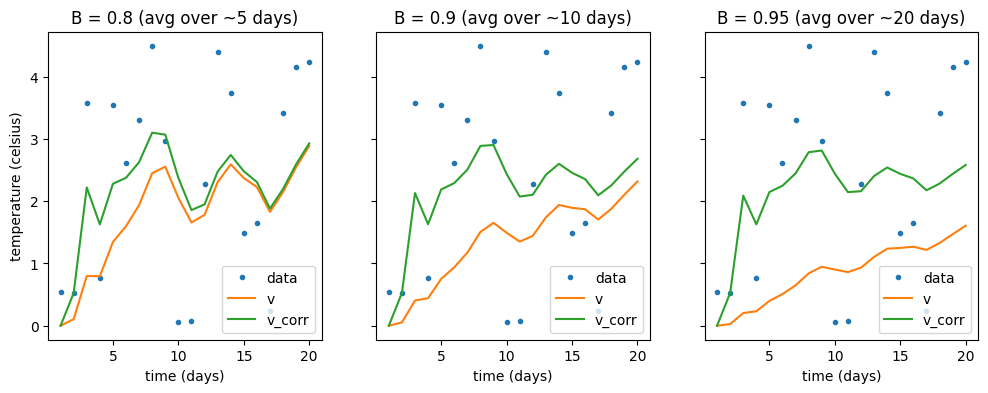

In [18]:
size_in = 20
beta = np.array([0.8, 0.9, 0.95])
x_in = np.arange(1, size_in + 1, 1)
y_in = np.random.rand(size_in) * 5

def ewma(size, y, B):
    v, v_corr = np.zeros(size), np.zeros(size)
    for t in range(1, len(y)):
        v[t] = (B * v[t-1]) + ((1 - B) * y[t])
        v_corr[t] = v[t] / (1 - B**t)

    return v, v_corr

fig, ax = plt.subplots(nrows=1, ncols=len(beta), sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("temperature (celsius)")

for B, axis in zip(beta, ax):
    v, v_corr = ewma(size_in, y_in, B)
    axis.set_title(f"B = {B} (avg over ~{int(round(1/(1-B)))} days)")
    axis.set_xlabel("time (days)")
    axis.plot(x_in, y_in, label="data", linestyle="", marker=".")
    axis.plot(x_in, v, label="v")
    axis.plot(x_in, v_corr, label="v_corr")
    axis.legend()

In the context of gradient descent, the EWMA resembles "momentum", allowing the algorithm to trend downhill more quickly without oscillations in dimensions that diverge from the global minimum. This strategy can be combined with any of the aforementioned gradient descent variants (batch, mini-batch, or stochastic).

The matrix $v_{\partial W^{[l]}}$ has the same shape as the weights $W^{[l]}$ and the weight derivatives. The matrix $v_{\partial b^{[l]}}$ has the same shape as the biases $b^{[l]}$ and the bias derivatives. Both are initialized to all zeros. The derivatives ${\partial W^{[l]}}$ and ${\partial b^{[l]}}$ are the normal values computed by backwards propagation, omitting the numerator $\partial J(\theta)$ for brevity. The new matrices $v_{\partial W^{[l]}}$ and $v_{\partial b^{[l]}}$ represent the computed EWMA values for weight and bias derivatives, respectively.

$$
\text{repeat until convergence}
\begin{cases}
v_{\partial W^{[l]}} & = (\beta \cdot v_{\partial W^{[l]}}) + \bigl((1 - \beta) \cdot {\partial W^{[l]}}\bigr) \\
v_{\partial b^{[l]}} & = (\beta \cdot v_{\partial b^{[l]}}) + \bigl((1 - \beta) \cdot {\partial b^{[l]}}\bigr) \\
\\
W^{[l]} & := W^{[l]} - \alpha \cdot v_{\partial W^{[l]}} \\
b^{[l]} & := b^{[l]} - \alpha \cdot v_{\partial b^{[l]}}
\end{cases}
$$

The algorithm can be modified by including the optional $v_{\partial W^{[l]}\_corr}$ and $v_{\partial b^{[l]}\_corr}$ bias correction steps. In practice, this is not commonly implemented because given a relatively large $\beta$ value, the EWMA algorithm will decay the older values. This makes the first few results less relevant over time.

$$
\text{repeat until convergence}
\begin{cases}
v_{\partial W^{[l]}} & = (\beta \cdot v_{\partial W^{[l]}}) + \bigl((1 - \beta) \cdot {\partial W^{[l]}}\bigr) \\
v_{\partial b^{[l]}} & = (\beta \cdot v_{\partial b^{[l]}}) + \bigl((1 - \beta) \cdot {\partial b^{[l]}}\bigr) \\
v_{\partial W^{[l]}}^{corr} & = \frac{v_{\partial W^{[l]}}}{1 - \beta^t} \\
v_{\partial b^{[l]}}^{corr} & = \frac{v_{\partial b^{[l]}}}{1 - \beta^t} \\
\\
W^{[l]} & := W^{[l]} - \alpha \cdot v_{\partial W^{[l]}}^{corr} \\
b^{[l]} & := b^{[l]} - \alpha \cdot v_{\partial b^{[l]}}^{corr}
\end{cases}
$$

#### Adaptive Moment Estimation (ADAM)
ADAM adds Root Mean Squared (RMS) propagation to the momentum-based gradient descent algorithm. RMS propagation allows gradient descent to speed up in the direction towards the global minimum while slowing down in directions orthogonal to the global minimum. It is similar in concept to momentum except computes the square of the derivatives ${\partial W^{[l]}}$ and ${\partial b^{[l]}}$ when computing an EWMA. When updating the weights, it multiplies $\alpha$ by the ratio of the momentum EWMA and the square root of that RMS-computed EWMA.

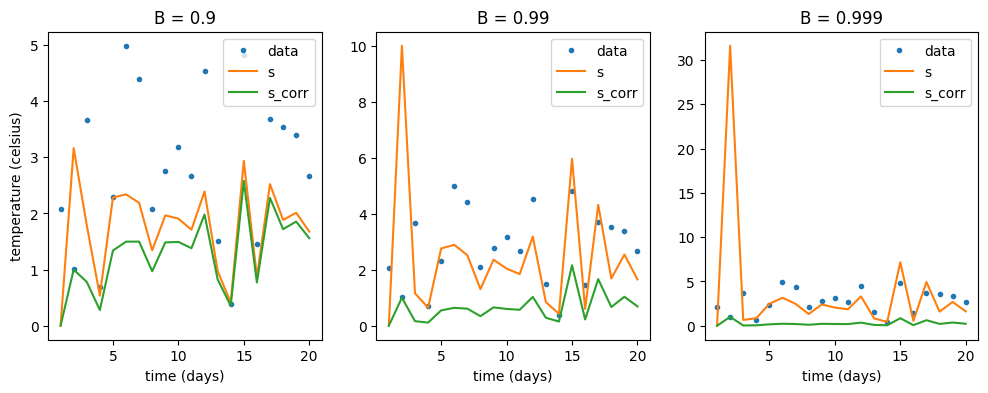

In [31]:
size_in = 20
beta = np.array([0.9, 0.99, 0.999])
x_in = np.arange(1, size_in + 1, 1)
y_in = np.random.rand(size_in) * 5

def rms_prop(size, y, B, epsilon=1e-8):
    s, s_corr = np.zeros(size), np.zeros(size)
    for t in range(1, len(y)):
        s[t] = (B * s[t-1]) + ((1 - B) * y[t]**2)
        s_corr[t] = s[t] / (1 - B**t)

        s[t] = y[t] / (np.sqrt(s[t]) + epsilon)
        s_corr[t] = y[t] / (np.sqrt(s_corr[t]) + epsilon)
        
    return s, s_corr

fig, ax = plt.subplots(nrows=1, ncols=len(beta), sharey=False)
fig.set_size_inches(12, 4)
ax[0].set_ylabel("temperature (celsius)")

for B, axis in zip(beta, ax):
    s, s_corr = rms_prop(size_in, y_in, B)
    axis.set_title(f"B = {B}")
    axis.set_xlabel("time (days)")
    axis.plot(x_in, y_in, label="data", linestyle="", marker=".")
    axis.plot(x_in, s, label="s")
    axis.plot(x_in, s_corr, label="s_corr")
    axis.legend()

The matrices $v_{\partial W^{[l]}}$ and $s_{\partial W^{[l]}}$ have the same shape as the weights $W^{[l]}$ and the weight derivatives. The matrices $v_{\partial b^{[l]}}$ and $s_{\partial b^{[l]}}$ have the same shape as the biases $b^{[l]}$ and the bias derivatives. These four matrices are initialized to all zeros. Note that both algorithms use $\beta$ in their formal definitions, which are rewritten as $\beta_1$ and $\beta_2$ to differentiate them. Their default values in most implementations are $\beta_1 = 0.9$ and $\beta_2 = 0.999$ which are rarely tuned. The tiny value $\varepsilon = 1 \times 10^{-8}$ is almost never tuned and only prevents against division by zero errors. The learning rate $\alpha$ remains the most interesting hyperparameter in ADAM.

$$
\text{repeat until convergence}
\begin{cases}
v_{\partial W^{[l]}} & = (\beta_1 \cdot v_{\partial W^{[l]}}) + \bigl((1 - \beta_1) \cdot {\partial W^{[l]}}\bigr) \\
v_{\partial b^{[l]}} & = (\beta_1 \cdot v_{\partial b^{[l]}}) + \bigl((1 - \beta_1) \cdot {\partial b^{[l]}}\bigr) \\
v_{\partial W^{[l]}}^{corr} & = \frac{v_{\partial W^{[l]}}}{1 - \beta_1^t} \\
v_{\partial b^{[l]}}^{corr} & = \frac{v_{\partial b^{[l]}}}{1 - \beta_1^t} \\
\\
s_{\partial W^{[l]}} & = (\beta_2 \cdot s_{\partial W^{[l]}}) + \bigl((1 - \beta_2) \cdot {\partial W^{[l]}}^2\bigr) \\
s_{\partial b^{[l]}} & = (\beta_2 \cdot s_{\partial b^{[l]}}) + \bigl((1 - \beta_2) \cdot {\partial b^{[l]}}^2\bigr) \\
s_{\partial W^{[l]}}^{corr} & = \frac{s_{\partial W^{[l]}}}{1 - \beta_2^t} \\
s_{\partial b^{[l]}}^{corr} & = \frac{s_{\partial b^{[l]}}}{1 - \beta_2^t} \\
\\
W^{[l]} & := W^{[l]} - \alpha \cdot \frac{v_{\partial W^{[l]}}^{corr}}{\sqrt{s_{\partial W^{[l]}}^{corr}} + \varepsilon} \\
b^{[l]} & := b^{[l]} - \alpha \cdot \frac{v_{\partial b^{[l]}}^{corr}}{\sqrt{s_{\partial b^{[l]}}^{corr}} + \varepsilon}
\end{cases}
$$

#### Optional: Gradient Checking
This technique is used for troubleshooting, not training, and can determine if your gradients (derivatives) have been computed correctly. Consider this definition of a derivative that includes sampling on both sides of the function:

$$
\frac{\partial}{\partial \theta_i}J(\vec{\theta}) = \lim_{\varepsilon \to 0}
\frac{J(\theta_1, \theta_2, \cdots, \theta_i + \varepsilon) -
J(\theta_1, \theta_2, \cdots, \theta_i - \varepsilon)}{2 \cdot \varepsilon}
$$

In this context, $\vec{\theta}$ is a 1D vector that contains all of the weights $W$ and biases $b$. The weight matrices are unrolled into one dimension and the biases are concatenated afterwards. This process repeats for every layer, resulting in a giant vector.

Next, repeat this flattening process for all of the derivatives computed with respect to each parameter $W$ and $b$. These derivatives are the result of back propagation and are the specific values that gradient checking will validate. Let's call this vector of gradients $\partial{\vec{\theta}}$ for short which has the same length as $\vec{\theta}$.

The gradient checking algorithm iterates over elements of $\vec{\theta}$, computing the cost using fixed values for each element in $\vec{\theta}$ except for the current one under evaluation $\theta_i$. This is how we approximate the derivatives with respect to individual parameters; we must fix all other elements of $\vec{\theta}$ and only change $\theta_i$ up by a tiny amount $\varepsilon$. The algorithm stores these gradient approximations in a vector that is also the same length as $\vec{\theta}$ and $\partial{\vec{\theta}}$. This new vector is $\partial{\vec{\theta}}_a$ with subscript $a$ indicating "approximate".

Theoretically, the derivatives computed by backward propagation should equal the approximated derivatives computed by gradient checking. In reality, the values will be slightly different. We can measure the similarity of these two vectors using a normalized variant of Euclidean distance.

$$
d = \frac{\|\partial{\vec{\theta}}_a - \partial{\vec{\theta}}\|_2}{\|\partial{\vec{\theta}}_a\|_2 + \|\partial{\vec{\theta}}\|_2}
$$

If the resulting distance $d$ is less than a tiny threshold, such as $1 \times 10^{-7}$, then backward propagation has computed the correct gradients. If the resulting distance is too large, it suggests a software bug. Examine the two gradient vectors closely and look for pairwise values that have large differences. This indicates the specific parameter at the specific layer where the bug is likely to be.

Note that the cost function $J(\vec{\theta})$ must include regularization, if applied, when performing gradient checking. If not, the approximated gradients and backprop-computed gradients will be very different. Also, gradient checking cannot work with dropout regularization as the cost function is not well-defined. You can use `keep_prob = 1` temporarily to run gradient checking on models using dropout.

#### Optional: Learning Rate Decay
This optional enhancement allows the learning rate $\alpha$ to send to slowly decrease (decay) as gradient descent runs. This may reduce oscillations near the global minimum, thus speeding up training. As $t$ increases over time, $\alpha$ decays more slowly, regardless of the implementation. Several plausible options are shown here; many others also exist.

1. Reduce the learning rate $\alpha$ with each epoch $t$ based on a specified rate of decay $r$ based on some initial learning rate $\alpha_0$. Larger values of $r$ yield faster rates of decay (faster reduction of $\alpha$), although values slightly greater than 0 are most reasonable. This update occurs after every iteration.

$$
\alpha = \frac{\alpha_{0}}{1+(r \cdot t)}
$$

2. Reduce the learning rate $\alpha$ after a certain number $n$ epochs $t$. This is a step-based decay using the mathematical "floor" function. A smaller value of $n$ yields more rapid decay as the learning rate changes more frequently.
$$
\alpha = \frac{\alpha_{0}}{1+\lfloor{\frac{t}{n}}\rfloor}
$$

3. Alternative implementation to per-iteration decay, relying on base $b \in \mathbb{R}\,|\,0 < b < 1$. It decays more rapidly at first, whereby smaller values of $b$ yield faster rates of decay in general. Values slightly less than 1 are most reasonable.
 
$$
\alpha = \alpha_{0} \cdot b^{t}
$$

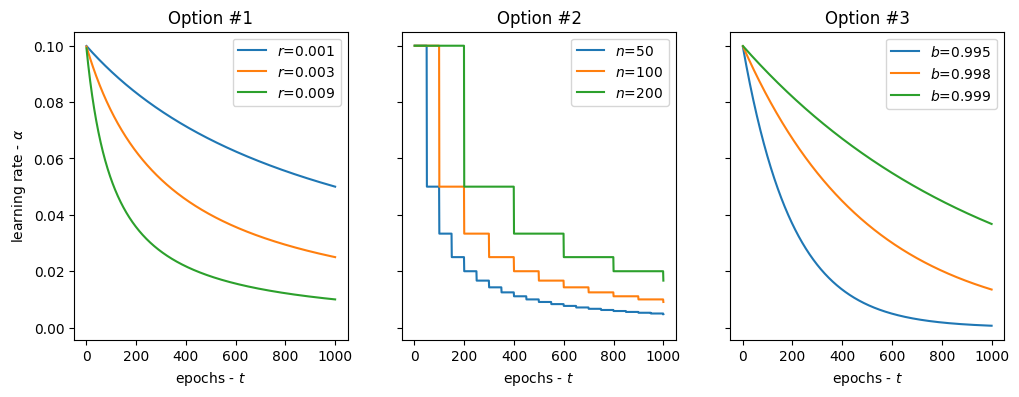

In [15]:
# Run with 1000 epochs and an initial learning rate
t = np.arange(1, 1001, 1, dtype=int)
a0 = 1.0e-01

# Make 3 subplots, one per option, then graph each function
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_size_inches(12, 4)
ax[0].set_ylabel(r"learning rate - $\alpha$")

for r in np.array([1.0e-3, 3.0e-3, 9.0e-3]):
    ax[0].plot(t, a0 / (1 + r * t), label=f"$r$={r}")

for n in np.array([50, 100, 200]):
    ax[1].plot(t, a0 / (1 + np.floor(t / n)), label=f"$n$={n}")

for b in np.array([0.995, 0.998, 0.999]):
    ax[2].plot(t, a0 * np.power(b, t), label=f"$b$={b}")

for i, axis in enumerate(ax, start=1):
    axis.set_title(f"Option #{i}")
    axis.set_xlabel("epochs - $t$")
    axis.legend()

#### Optional: Hyperparameter Tuning
Hyperparameters are human-selected values that are used by the model but are not trained by it. This section describes common techniques for selecting hyperparameters. Note that as the input data changes over time, hyperparameters should be re-evaluated to ensure they are still adequate for data set.

To use an Information Technology (IT) analogy, AI models can be seen as pets or cattle. As pets, we closely monitor them, making small adjustments to hyperparameters to optimize performance. This approach is typically used when compute resources are limited or during training/experimentation. Perhaps only one model can be trained at once. 

As cattle, we raise several at the same time, combining different hyperparameters together to yield several models. This assumes that compute resources are ample and that hyperparameter combinations have been determined ahead of time. At the end of the process, select the best model based on some metric such as lowest cost, highest accuracy/precision/recall, etc.

Suppose we are using gradient descent with momentum, which has 2 important hyperparameters: the learning rate $\alpha$, and the momentum $\beta$. There are several methods for selecting values.

  1. __Grid uniform__: On the linear scale, select values at fixed intervals across a range of reasonable values for each hyperparameter. When visualized on a 2D plot, it looks like a grid. This approach is conceptually simple and deterministic, but it limits the number of unique hyperparameter values available.

  2. __Random uniform__: On a linear scale, randomly generate reasonable values for each hyperparameter. The coverage area is the same as the grid, but tends to work better. If one hyperparameter has a very small impact on the learning algorithm (say $\beta$), the randomness will yield more options for the other hyperparameter (say $\alpha$), which presumably has a larger impact.

  3. __Random log__: On a logarithmic scale, randomly generate reasonable values for each hyperparameter. This provides the benefits of diverse value selection while also more evenly distributing samples across logarithmic ranges. Consider $\beta$ which typically ranges from 0.9 to 0.999. Rather than uniformly sample across this range, it's more effective to collect a roughly equal number of samples across the different orders of magnitude. 

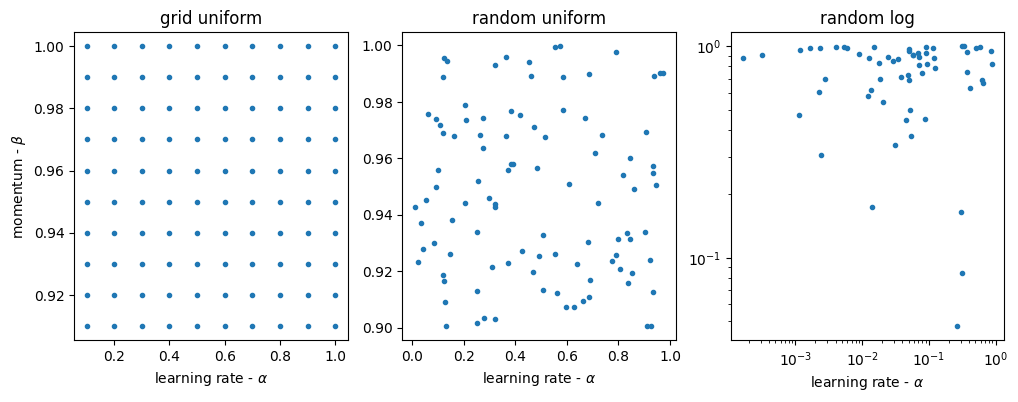

In [51]:
alpha = [
    np.tile(np.arange(0.1, 1.1, 0.1), 10),
    np.random.uniform(1e-5, 1,(100,)),
    np.array([[10**(-power * np.random.rand()) for _ in range(20)] for power in range(1,5)]).flatten(),
]
beta = [
    np.repeat(np.arange(0.91, 1.01, 0.01), 10),
    np.random.uniform(1 - 1e-1, 1 - 1e-5,(100,)),
    np.array([[1 - (10**(-power * np.random.rand())) for _ in range(20)] for power in range(4)]).flatten(),
]
desc = ["grid uniform", "random uniform", "random log"]
scale = ["linear", "linear", "log"]

fig, ax = plt.subplots(nrows=1, ncols=len(desc), sharey=False)
fig.set_size_inches(12, 4)
ax[0].set_ylabel(r"momentum - $\beta$")

for i in range(len(desc)):
    ax[i].set_xscale(scale[i]); plt.yscale(scale[i])
    ax[i].set_title(desc[i])
    ax[i].set_xlabel(r"learning rate - $\alpha$")
    ax[i].plot(alpha[i], beta[i], marker=".", linestyle="")